In [75]:
import pandas as pd
from sklearn import preprocessing, model_selection, neighbors


In [76]:
# dfv = pd.read_excel('Downloads/RetailSales Train.xlsx')
dft = pd.read_excel('Downloads/RetailSales Validate.xlsx')

In [77]:
dft.head()

,InvoiceID,Status,ItemID,Description,Quantity,InvoiceDate,Price,CustomerID
0,536380,Delivered,22961,JAM MAKING SET PRINTED,24,2010-12-01 09:41:00,126.15,17809
1,536381,Delivered,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,369.75,15311
2,536381,Delivered,84854,GIRLY PINK TOOL SET,5,2010-12-01 09:41:00,430.65,15311
3,536381,Delivered,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,2010-12-01 09:41:00,169.65,15311
4,536381,Delivered,82567,"AIRLINE LOUNGE,METAL SIGN",2,2010-12-01 09:41:00,182.70,15311


In [78]:
dft = dft[dft['Status']=='Delivered']

In [79]:
dft = dft[dft['ItemID']!='POST']
dft['InvoiceDate'] = dft['InvoiceDate'].apply(pd.to_datetime)

In [80]:
dft['month'] = dft.InvoiceDate.dt.month

In [81]:
dft['date'] = dft.InvoiceDate.dt.day

In [82]:
dft['year'] = dft.InvoiceDate.dt.year
dft['hour'] = dft.InvoiceDate.dt.hour

In [83]:
dft = dft[dft['Quantity']>0]

In [10]:
dft.reset_index()

,index,InvoiceID,Status,ItemID,Description,Quantity,InvoiceDate,Price,CustomerID,month,date,year,hour
0,0,536380,Delivered,22961,JAM MAKING SET PRINTED,24,2010-12-01 09:41:00,126.15,17809,12,1,2010,9
1,1,536381,Delivered,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,369.75,15311,12,1,2010,9
2,2,536381,Delivered,84854,GIRLY PINK TOOL SET,5,2010-12-01 09:41:00,430.65,15311,12,1,2010,9
3,3,536381,Delivered,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,2010-12-01 09:41:00,169.65,15311,12,1,2010,9
4,4,536381,Delivered,82567,"AIRLINE LOUNGE,METAL SIGN",2,2010-12-01 09:41:00,182.70,15311,12,1,2010,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41256,42148,581580,Delivered,22567,20 DOLLY PEGS RETROSPOT,1,2011-12-09 12:20:00,126.15,12748,12,9,2011,12
41257,42149,581580,Delivered,79321,CHILLI LIGHTS,2,2011-12-09 12:20:00,500.25,12748,12,9,2011,12
41258,42150,581580,Delivered,37500,TEA TIME TEAPOT IN GIFT BOX,1,2011-12-09 12:20:00,430.65,12748,12,9,2011,12
41259,42151,581584,Delivered,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,62.64,13777,12,9,2011,12


In [11]:
dft['hour'].unique()

array([ 9, 11, 13, 14, 15, 16,  8, 10, 12, 17, 18, 19,  7])

In [12]:
def hour_to_factor(x):
    m = 5
#     print(m)
    for i in range(1,m+1):
        if x<i*(24/m):
            return i
    return m

In [13]:
dft['hour'] = dft['hour'].apply(hour_to_factor)

In [14]:
c = 0
item = {}
for i in (dft['ItemID'].unique()):
    item[i] = c
    c+=1
dft['ItemID'] = list(map(lambda x: item[x],dft['ItemID']))
X = dft[['CustomerID']]
y = dft[['hour']]
# X,y?                dft['hour'].loc[i] = j


In [15]:
dft['hour'].unique()

array([2, 3, 4])

In [16]:
import math
import numpy as np
import pandas as pd
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression

X = preprocessing.scale(X)
y = np.array(y)

In [17]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)
clf = neighbors.KNeighborsClassifier()
len(X_train)

28882

In [18]:
clf.fit(X_train, y_train)


/home/zeldariomon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
confidence = clf.score(X_test, y_test)
# print(X_train,y_train)
# print(X_test,y_test)

In [20]:
confidence

0.8863397689635674

In [21]:
import seaborn as sns

In [26]:
from mlxtend.plotting import plot_learning_curves

/home/zeldariomon/.local/lib/python3.6/site-packages/mlxtend/plotting/learning_curves.py:104: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model = clf.fit(X_train[:r], y_train[:r])
/home/zeldariomon/.local/lib/python3.6/site-packages/mlxtend/plotting/learning_curves.py:104: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model = clf.fit(X_train[:r], y_train[:r])
/home/zeldariomon/.local/lib/python3.6/site-packages/mlxtend/plotting/learning_curves.py:104: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model = clf.fit(X_train[:r], y_train[:r])
/home/zeldariomon/.local/lib/python3.6/site-packages/mlxtend/plotting/learning_curves.py:104: DataConversionWarning: A

([1269.3206371191136,
  2581.2375346260387,
  3839.5377423822715,
  5353.157029085873,
  6570.651547676754,
  7876.589012637774,
  9041.305980115743,
  10260.92611988747,
  11559.605663063132,
  12946.395090367703],
 [5407.968656595848,
  5693.909847322077,
  5590.080620405525,
  5871.851199612247,
  5730.543016398739,
  5762.162048630746,
  5634.203408999111,
  5642.964698279344,
  5641.935697552306,
  5688.3354067372165])

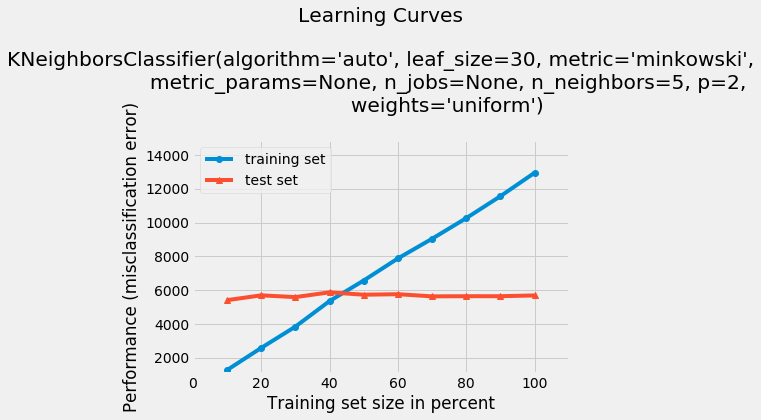

In [27]:
plot_learning_curves(X_train,y_train,X_test,y_test,clf)

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
# yTest = pd.Series(y_test)
y_test_id = []
for i in range(len(y_test)):
    y_test_id.append(y_test[i][0])

In [47]:
yTest = pd.Series(y_test_id)

In [63]:
yTest.value_counts()

3    8495
4    2855
2    1029
dtype: int64

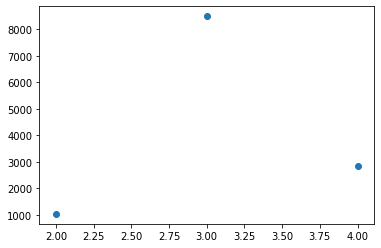

In [68]:
plt.scatter(x=[3,4,2],y=yTest.value_counts())

<BarContainer object of 12379 artists>

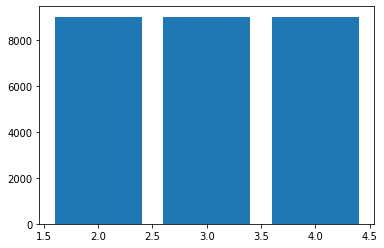

In [72]:
plt.bar(yTest,9000)

In [74]:
dft['hour'].unique()

array([2, 3, 4])

(array([3., 1., 1., 2., 0., 0., 1., 2., 2., 1.]),
 array([  71. ,  749.9, 1428.8, 2107.7, 2786.6, 3465.5, 4144.4, 4823.3,
        5502.2, 6181.1, 6860. ]),
 <a list of 10 Patch objects>)

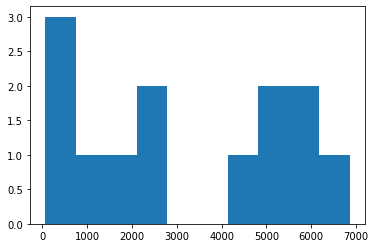

In [89]:
plt.hist(dft['hour'].value_counts())

In [94]:
a = dft['hour'].value_counts()[:10]
type(a)

AttributeError: 'Series' object has no attribute 'sort'

In [95]:
dft['hour'].value_counts()

12    6860
14    5865
11    5705
13    5283
10    4889
15    4723
9     2220
16    2201
17    1517
8      992
18     531
19     404
7       71
Name: hour, dtype: int64

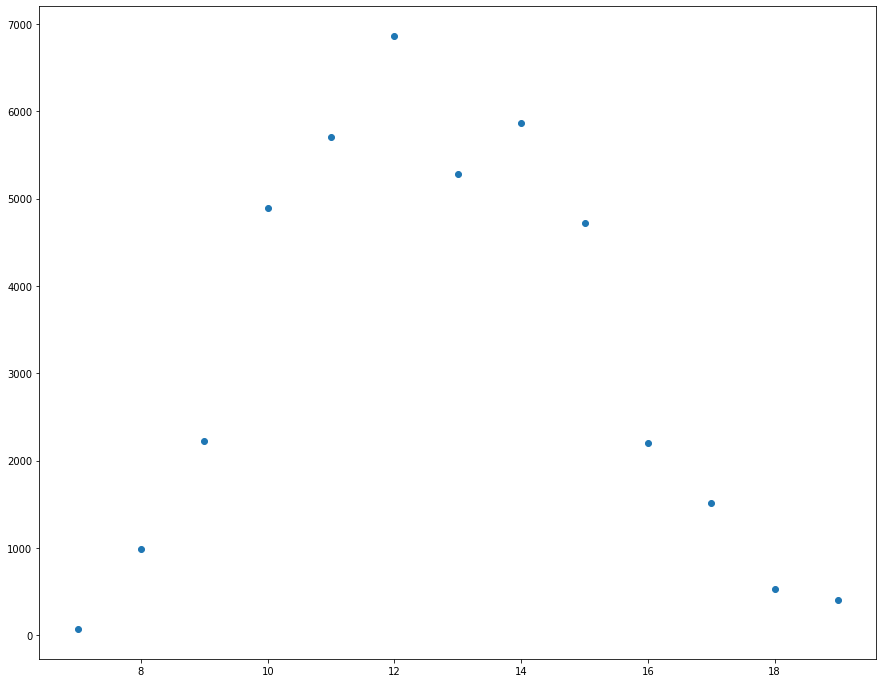

In [104]:
plt.figure(figsize=(15,12))
plt.scatter(x=[12,14,11,13,10,15,9,16,17,8,18,19,7],y=dft['hour'].value_counts())